# Mini Project - Classification

## Business objective

### Build a predictive model to determine the grade of the house. (The grades are A,B,C,D and E with A being the best and E the worst)

# Import Libraries

In [190]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier


from sklearn.metrics import accuracy_score,classification_report,recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score


import warnings
warnings.filterwarnings('ignore')

# Read the data

In [3]:
data=pd.read_csv("Project2_Classification_HouseGrade_Data_Project.csv")
data

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


# Data understanding

In [4]:
data.columns

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

In [5]:
data.size            #total number of observations

42000

In [6]:
data.shape        #rows and columns

(3000, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [8]:
data.describe().T        #summary of numerical data

,count,mean,std,min,25%,50%,75%,max
Id,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Area(total),3000.0,325.117000,20.507742,290.0,308.00,325.0,343.00,360.0
Trooms,3000.0,7.021667,1.421221,5.0,6.00,7.0,8.00,9.0
Nbedrooms,3000.0,5.023000,1.634838,2.0,4.00,5.0,6.00,8.0
Nbwashrooms,3000.0,4.513667,1.715263,1.0,3.00,4.0,6.00,8.0
Twashrooms,3000.0,6.010667,1.786136,2.0,5.00,6.0,7.00,10.0
Roof(Area),3000.0,48.980667,48.746641,0.0,0.00,71.0,96.00,120.0
Lawn(Area),3000.0,95.609333,14.837388,70.0,83.00,96.0,109.00,120.0
Nfloors,3000.0,4.013333,1.621532,1.0,3.00,4.0,5.00,7.0
API,3000.0,70.190667,17.563460,40.0,55.00,70.0,85.00,100.0


In [9]:
data.describe(include='object').T          #summary of object data

,count,unique,top,freq
roof,3000,2,YES,1543
Grade,3000,5,D,1270


In [10]:
data.isna().sum()          #checking for null values

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

### There are no null values in the data

In [11]:
data.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

### Two columns, roof and grade are categorical columns, so we have to encode them into numerical columns

# Label encoding

In [13]:
label=LabelEncoder()

In [14]:
data['roof_encoder']=label.fit_transform(data.roof)

In [15]:
data['Grade_encode']=label.fit_transform(data.Grade)

In [16]:
data

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade,roof_encoder,Grade_encode
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D,0,3
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D,1,3
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C,1,2
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D,1,3
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B,1,1
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A,1,0
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D,0,3
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B,0,1


# EDA

## Univariate

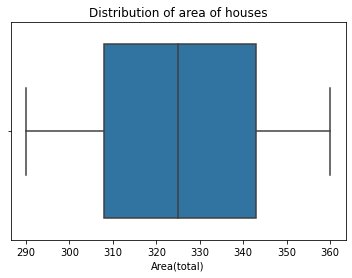

In [21]:
sns.boxplot(data['Area(total)'])
plt.title("Distribution of area of houses")
plt.show()

### Most of the houses have Area in the range of 305 - 345

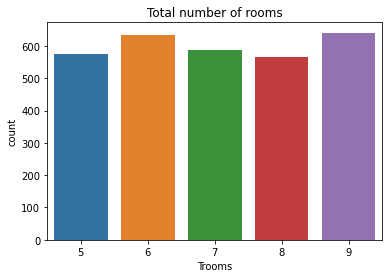

In [23]:
sns.countplot(data.Trooms)
plt.title("Total number of rooms")
plt.show()

### The number of rooms is uniformly spread across the number of houses. Most houses have 9 rooms

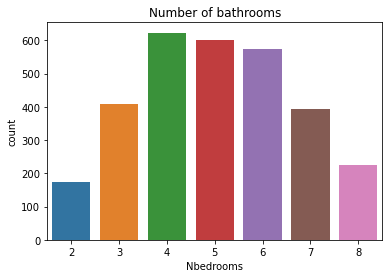

In [26]:
sns.countplot(data.Nbedrooms)
plt.title("Number of bathrooms")
plt.show()

### Most houses have 4 bedrooms. The most popular number of bedrooms are 4,5 and 6

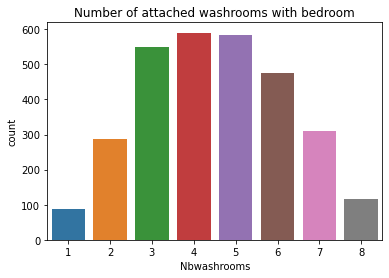

In [30]:
sns.countplot(data.Nbwashrooms)
plt.title("Number of attached washrooms with bedroom")
plt.show()

### Most houses have 4 washrooms attached with bedroom. The most popular number of washrooms are 3,4 and 5

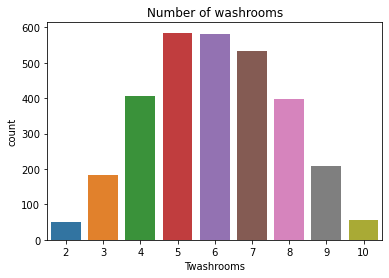

In [29]:
sns.countplot(data.Twashrooms)
plt.title("Number of washrooms")
plt.show()

### Most houses have 5 washrooms. The most popular number of washrooms are 5,6 and 7

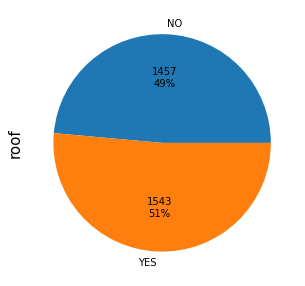

In [31]:
labels=data['roof'].unique()
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
data.groupby(data['roof']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('roof', size=15)
# show plot
plt.show()

### There are almost same number of houses with and without roof

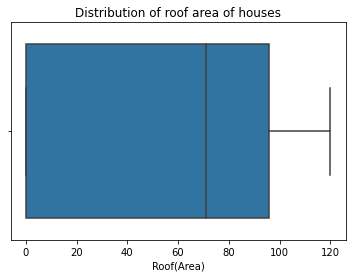

In [33]:
sns.boxplot(data['Roof(Area)'])
plt.title("Distribution of roof area of houses")
plt.show()

### The roof area of houses is mostly in between 0 - 100

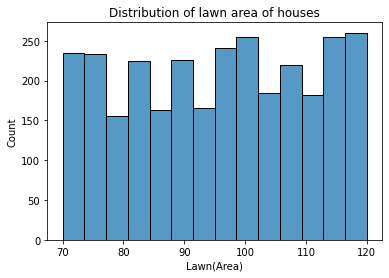

In [36]:
sns.histplot(data['Lawn(Area)'])
plt.title("Distribution of lawn area of houses")
plt.show()

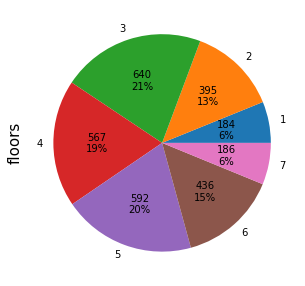

In [39]:
labels=data['Nfloors'].unique()
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
data.groupby(data['Nfloors']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('floors', size=15)
# show plot
plt.show()

### Most houses have either 3,4 or 5 floors

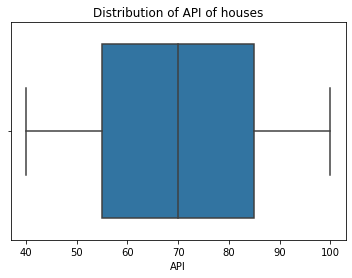

In [41]:
sns.boxplot(data['API'])
plt.title("Distribution of API of houses")
plt.show()

### The API for a house is usually in the range of 55-85

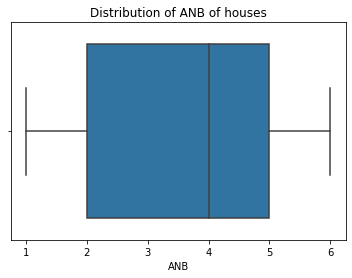

In [43]:
sns.boxplot(data['ANB'])
plt.title("Distribution of ANB of houses")
plt.show()

### The ANB is in the range of 2-5 for most houses

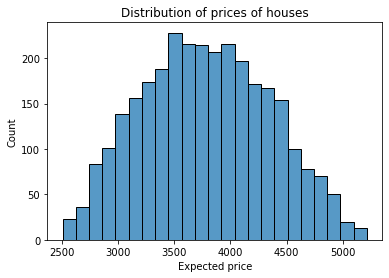

In [45]:
sns.histplot(data['Expected price'])
plt.title("Distribution of prices of houses")
plt.show()

### The distributaion of prices of houses is shown in the above histogram. The price mostly ranges from 3500-4500

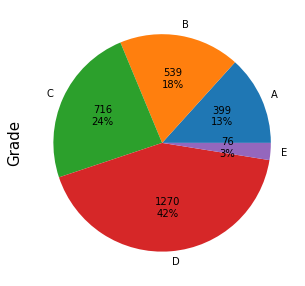

In [46]:
labels=data['Grade'].unique()
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
data.groupby(data['Grade']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Grade', size=15)
# show plot
plt.show()

### Most of the houses are of grade D. There are least number of houses with grade E

# Bivariate

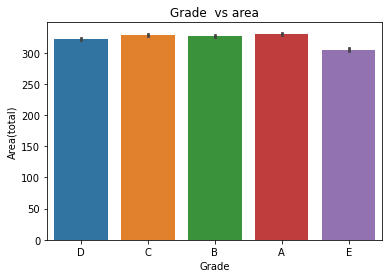

In [48]:
sns.barplot(data.Grade,data['Area(total)'])
plt.title("Grade  vs area")
plt.show()

### All the grades of houses have almost the same Area in total

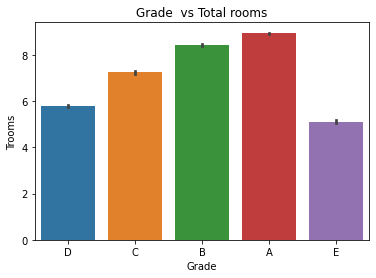

In [50]:
sns.barplot(data.Grade,data['Trooms'])
plt.title("Grade  vs Total rooms")
plt.show()

### We can see that the houses with Grade A have higher number of rooms. The number of rooms decreases as the grade lowers

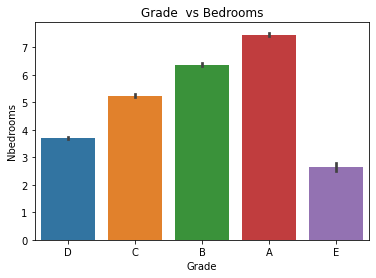

In [51]:
sns.barplot(data.Grade,data['Nbedrooms'])
plt.title("Grade  vs Bedrooms")
plt.show()

### We can see that the houses with Grade A have higher number of bedrooms. The number of bedrooms decreases as the grade lowers

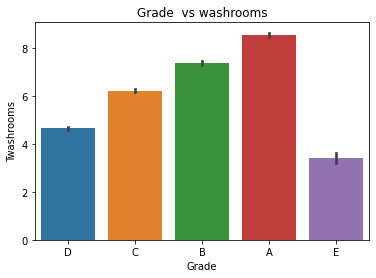

In [52]:
sns.barplot(data.Grade,data['Twashrooms'])
plt.title("Grade  vs washrooms")
plt.show()

### We can see that the houses with Grade A have higher number of washrooms. The number of washrooms decreases as the grade lowers

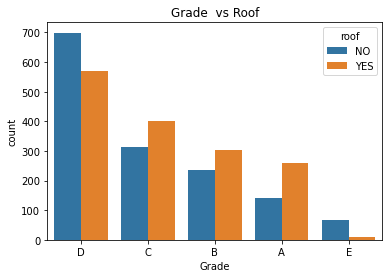

In [59]:
sns.countplot(data.Grade,hue=data.roof)
plt.title("Grade  vs Roof")
plt.show()

### We can observe that houses with roof and without roof are almost the same

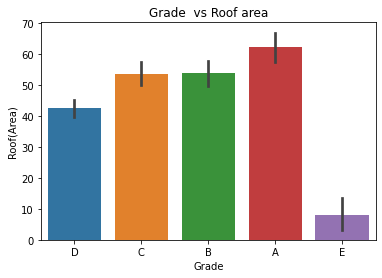

In [60]:
sns.barplot(data.Grade,data['Roof(Area)'])
plt.title("Grade  vs Roof area")
plt.show()

### We can see that the Grade A houses have most roof area and the roof area decreases with grade

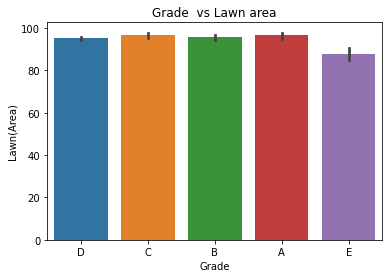

In [62]:
sns.barplot(data.Grade,data['Lawn(Area)'])
plt.title("Grade  vs Lawn area")
plt.show()

### The lawn area is equally spread across all the grades of houses

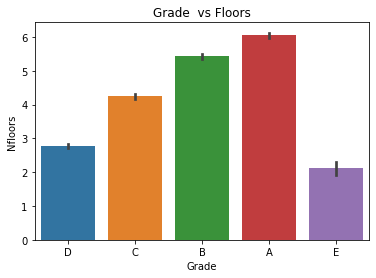

In [63]:
sns.barplot(data.Grade,data['Nfloors'])
plt.title("Grade  vs Floors")
plt.show()

### Grade A houses have highest number of floors. The number of floors decrease with the grade of the house

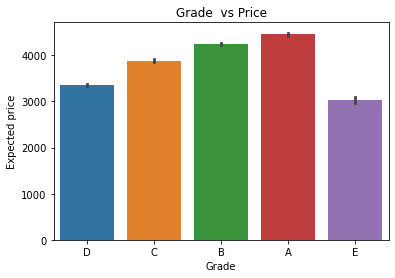

In [64]:
sns.barplot(data.Grade,data['Expected price'])
plt.title("Grade  vs Price")
plt.show()

### The price of houses increases as the grade increases. Grade A houses are the costiest

# Multivariate

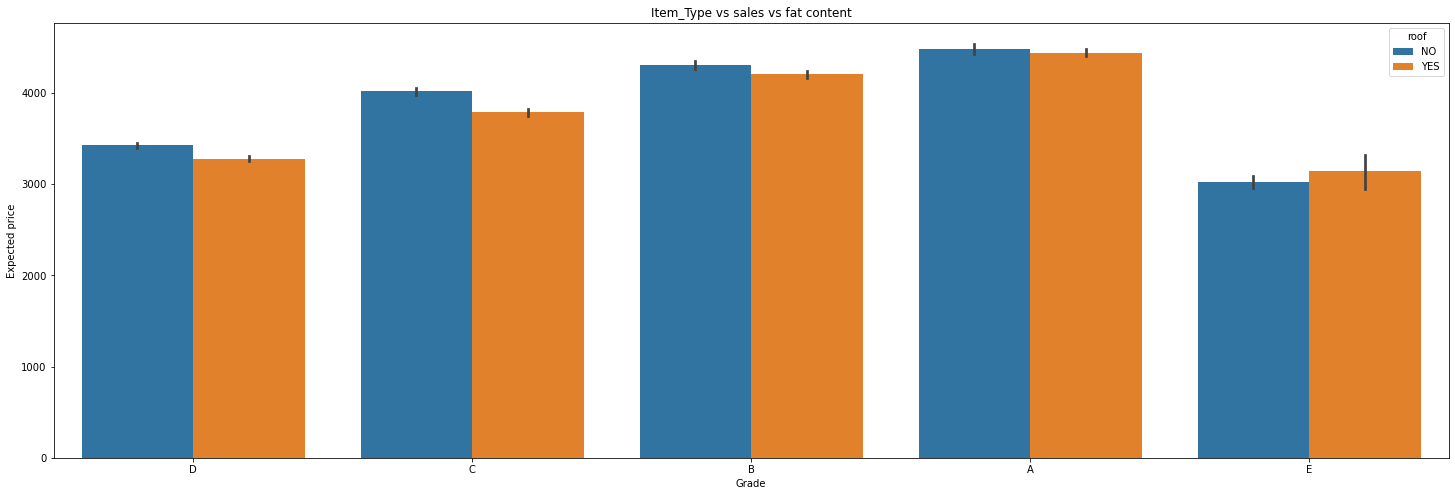

In [67]:
plt.figure(figsize=(25,8))
sns.barplot(data.Grade,data['Expected price'],hue=data.roof)
plt.title("Item_Type vs sales vs fat content")
plt.show()

### All the houses with roof and no roofs under each grade have almost the same price

# Correlation

In [73]:
corr=data.corr()                #correlation with heatmap
corr.style.background_gradient(cmap='YlOrRd')

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,roof_encoder,Grade_encode
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,0.011059,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,0.014229,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,0.025142,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,0.023058,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,0.028549,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,0.028212,-0.819280
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,0.976561,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.004640,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,0.014985,-0.787623
API,-0.003739,-0.000182,0.007502,0.002820,0.011413,0.012361,-0.006331,0.011477,-0.002255,1.000000,-0.025694,0.016575,-0.007983,-0.099000


### Based on the correlation values of each column with the Grade we select the features with the best correlation to obtain a good model to predict the correct Grade of the house

### The columns we select for modelling are Grade_encode,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof_encoder,Roof(Area),Nfloors,Expected price

In [77]:
d1=data[['Grade_encode','Area(total)','Trooms','Nbedrooms','Nbwashrooms','Twashrooms','roof_encoder','Roof(Area)','Nfloors','Expected price']]

In [78]:
d1

,Grade_encode,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof_encoder,Roof(Area),Nfloors,Expected price
0,3,339,6,5,4,6,0,0,2,3481
1,3,358,5,4,3,4,1,71,3,3510
2,2,324,7,5,4,5,1,101,5,3748
3,3,330,6,4,3,5,1,101,2,3134
4,3,320,7,4,4,5,0,0,3,3843
...,...,...,...,...,...,...,...,...,...,...
2995,1,341,9,6,5,7,1,95,5,4246
2996,0,292,9,8,7,8,1,116,7,3753
2997,3,328,7,4,3,5,0,0,5,3607
2998,1,293,9,7,7,8,0,0,7,4198


# Data scaling

In [81]:
scale=MinMaxScaler()

In [86]:
scaled_data=pd.DataFrame(scale.fit_transform(d1.drop(columns='Grade_encode')),columns=d1.drop(columns='Grade_encode').columns)

In [87]:
scaled_data

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof_encoder,Roof(Area),Nfloors,Expected price
0,0.700000,0.25,0.500000,0.428571,0.500,0.0,0.000000,0.166667,0.360251
1,0.971429,0.00,0.333333,0.285714,0.250,1.0,0.591667,0.333333,0.370944
2,0.485714,0.50,0.500000,0.428571,0.375,1.0,0.841667,0.666667,0.458702
3,0.571429,0.25,0.333333,0.285714,0.375,1.0,0.841667,0.166667,0.232301
4,0.428571,0.50,0.333333,0.428571,0.375,0.0,0.000000,0.333333,0.493732
...,...,...,...,...,...,...,...,...,...
2995,0.728571,1.00,0.666667,0.571429,0.625,1.0,0.791667,0.666667,0.642330
2996,0.028571,1.00,1.000000,0.857143,0.750,1.0,0.966667,1.000000,0.460546
2997,0.542857,0.50,0.333333,0.285714,0.375,0.0,0.000000,0.666667,0.406711
2998,0.042857,1.00,0.833333,0.857143,0.750,0.0,0.000000,1.000000,0.624631


### In this project we have labelled data and we have a dependent variable (Grade), so we perform supervised ML

### As our dependent variable sales is categorical, this falls under classificcation model

### Here we have to predict the grade of the houses

# Data splitting

In [90]:
x=scaled_data
y=d1.Grade_encode

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=10)

### Here we are splitting the as 70% train data and 30% test data and we are keeping random state as 10

# ML modelling

## LogisticRegression

In [100]:
lg_model=LogisticRegression()

In [102]:
lg_model=lg_model.fit(x_train,y_train)

In [103]:
lg_model.score(x_train,y_train)          #model score for training data

0.8852380952380953

In [104]:
lg_model.score(x_test,y_test)           #model score for test data

0.8733333333333333

### The model score for testing and training is close so there is no overfitting

In [105]:
lg_predict=lg_model.predict(x_test)        #predicted values for test data

In [109]:
lg_acc=accuracy_score(y_test,lg_predict)

In [110]:
print("The accuracy score for logistic regression model is: ",lg_acc)

The accuracy score for logistic regression model is:  0.8733333333333333


# Navie Bayes

In [112]:
nb_model=GaussianNB()

In [113]:
nb_model=nb_model.fit(x_train,y_train)

In [114]:
nb_model.score(x_train,y_train)          #model score for training data

0.8052380952380952

In [115]:
nb_model.score(x_test,y_test)           #model score for test data

0.7533333333333333

### The model score for testing and training is close so there is no overfitting

In [116]:
nb_predict=nb_model.predict(x_test)        #predicted values for test data

In [117]:
nb_acc=accuracy_score(y_test,nb_predict)

In [118]:
print("The accuracy score for Navie Bayes model is: ",nb_acc)

The accuracy score for Navie Bayes model is:  0.7533333333333333


# Decision Tree

In [120]:
dt_model=DecisionTreeClassifier()

In [121]:
dt_model=dt_model.fit(x_train,y_train)

In [122]:
dt_model.score(x_train,y_train)          #model score for training data

1.0

In [123]:
dt_model.score(x_test,y_test)           #model score for test data

0.8255555555555556

### The model score for testing and training is not close so there is  overfitting

In [124]:
dt_predict=dt_model.predict(x_test)        #predicted values for test data

In [125]:
dt_acc=accuracy_score(y_test,dt_predict)

In [126]:
print("The accuracy score for Decision tree  model is: ",dt_acc)

The accuracy score for Decision tree  model is:  0.8255555555555556


# Random Forest

In [128]:
rd_model=RandomForestClassifier()

In [129]:
rd_model=rd_model.fit(x_train,y_train)

In [130]:
rd_model.score(x_train,y_train)          #model score for training data

1.0

In [131]:
rd_model.score(x_test,y_test)           #model score for test data

0.8644444444444445

### The model score for testing and training is not close so there is  overfitting

In [132]:
rd_predict=rd_model.predict(x_test)        #predicted values for test data

In [133]:
rd_acc=accuracy_score(y_test,rd_predict)

In [134]:
print("The accuracy score for Random forest model is: ",rd_acc)

The accuracy score for Random forest model is:  0.8644444444444445


# AdaBoosting

In [136]:
ada_model=AdaBoostClassifier()

In [137]:
ada_model=ada_model.fit(x_train,y_train)

In [138]:
ada_model.score(x_train,y_train)          #model score for training data

0.5847619047619048

In [139]:
ada_model.score(x_test,y_test)           #model score for test data

0.5955555555555555

### The model score for testing and training is close so there is  no overfitting

In [140]:
ada_predict=ada_model.predict(x_test)        #predicted values for test data

In [141]:
ada_acc=accuracy_score(y_test,ada_predict)

In [142]:
print("The accuracy score for AdaBoosting  model is: ",ada_acc)

The accuracy score for AdaBoosting  model is:  0.5955555555555555


# Stacking

In [162]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('ADA', AdaBoostClassifier()))
	level0.append(('NB', GaussianNB()))
	level0.append(('LR', LogisticRegression()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [163]:
stack_model=get_stacking()

In [164]:
stack_model=stack_model.fit(x_train,y_train)

In [165]:
stack_model.score(x_train,y_train)          #model score for training data

0.8885714285714286

In [166]:
stack_model.score(x_test,y_test)           #model score for test data

0.8822222222222222

### The model score for testing and training is close so there is no  overfitting

In [167]:
stack_predict=stack_model.predict(x_test)        #predicted values for test data

In [168]:
stack_acc=accuracy_score(y_test,stack_predict)

In [169]:
print("The accuracy score for Stacking  model is: ",stack_acc)

The accuracy score for Stacking  model is:  0.8822222222222222


# Model selection

### Here we select the best ML model for prediction based on the accuracy of each model

### We do not consider Decision Tree and Random Forest models as there is overfitting

In [170]:
accuracy={'Logistic regression':lg_acc,'Navie Bayes':nb_acc,'AdaBoosting':ada_acc,'Stacking':stack_acc}

In [171]:
name=list(accuracy.keys())
values=list(accuracy.values())

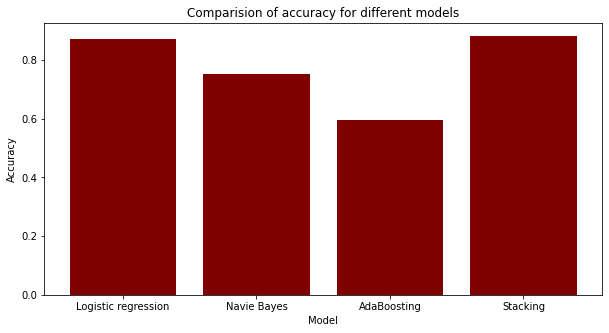

In [172]:
plt.figure(figsize=(10,5))
plt.bar(name,values,color='maroon')
plt.title("Comparision of accuracy for different models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

### We can see from the graph that Logistic regression and Stacking have the highest accuracy

In [173]:
print("The accuracy score for Stacking  model is: ",stack_acc)

The accuracy score for Stacking  model is:  0.8822222222222222


In [174]:
print("The accuracy score for logistic regression model is: ",lg_acc)

The accuracy score for logistic regression model is:  0.8733333333333333


### Here based on the higher accuracy for Stacking model we consider it as the best model

# BEST MODEL : Stacking

In [175]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('ADA', AdaBoostClassifier()))
	level0.append(('NB', GaussianNB()))
	level0.append(('LR', LogisticRegression()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [176]:
stack_model=get_stacking()

In [177]:
stack_model=stack_model.fit(x_train,y_train)

In [178]:
stack_model.score(x_train,y_train)          #model score for training data

0.8885714285714286

In [179]:
stack_model.score(x_test,y_test)           #model score for test data

0.8822222222222222

### The model score for testing and training is close so there is no  overfitting

In [180]:
stack_predict=stack_model.predict(x_test)        #predicted values for test data

In [181]:
stack_acc=accuracy_score(y_test,stack_predict)

In [182]:
print("The accuracy score for Stacking  model is: ",stack_acc)

The accuracy score for Stacking  model is:  0.8822222222222222


# Model Evaluvation

In [187]:
print("STACKING MODEL EVALUVATION : ")
print('accuracy:', accuracy_score(y_test, stack_predict))         #model evaluvation
print('recall:', recall_score(y_test, stack_predict,average='weighted'))
print('f1-score:', f1_score(y_test, stack_predict,average='weighted'))
print('precision:', precision_score(y_test, stack_predict,average='weighted'))

STACKING MODEL EVALUVATION : 
accuracy: 0.8822222222222222
recall: 0.8822222222222222
f1-score: 0.8785912419117952
precision: 0.8816471758475497


In [189]:
print(classification_report(y_test,stack_predict))        #the classification report

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        96
           1       0.87      0.84      0.85       167
           2       0.85      0.84      0.84       224
           3       0.90      0.95      0.93       390
           4       0.89      0.35      0.50        23

    accuracy                           0.88       900
   macro avg       0.88      0.78      0.80       900
weighted avg       0.88      0.88      0.88       900



In [200]:
a=pd.DataFrame(y_test)

In [201]:
a['predicted_grade']=stack_predict

In [202]:
a

,Grade_encode,predicted_grade
1779,3,3
341,3,3
1276,2,2
1012,3,3
470,1,1
...,...,...
2857,3,3
1561,1,0
908,3,3
1839,3,3


In [203]:
a['original_grade']=y_test

In [206]:
a['predicted_grade_']=stack_predict

In [212]:
a.original_grade.replace({0:'A',1:'B',2:'C',3:'D',4:'E'},inplace=True)
a.predicted_grade_.replace({0:'A',1:'B',2:'C',3:'D',4:'E'},inplace=True)

In [213]:
a

,Grade_encode,predicted_grade,original_grade,predicted_grade_
1779,3,3,D,D
341,3,3,D,D
1276,2,2,C,C
1012,3,3,D,D
470,1,1,B,B
...,...,...,...,...
2857,3,3,D,D
1561,1,0,B,A
908,3,3,D,D
1839,3,3,D,D


### The original grades with the predicted ones are shown in the above table

### The Stacking model has high values of accuracy,recall,f1-score and precision. 
### So the best model to predict the grade of houses is the Stacking model

# Insights

Most of the houses have Area in the range of 305 - 345  
The number of rooms is uniformly spread across the number of houses. Most houses have 9 rooms  
Most houses have 4 bedrooms. The most popular number of bedrooms are 4,5 and 6  
Most houses have 4 washrooms attached with bedroom. The most popular number of washrooms are 3,4 and 5  
Most houses have 5 washrooms. The most popular number of washrooms are 5,6 and 7  
There are almost same number of houses with and without roof  
The roof area of houses is mostly in between 0 - 100  
Most houses have either 3,4 or 5 floors  
The API for a house is usually in the range of 55-85  
The ANB is in the range of 2-5 for most houses  
The distributaion of prices of houses is shown in the above histogram. The price mostly ranges from 3500-4500  
Most of the houses are of grade D. There are least number of houses with grade E  
All the grades of houses have almost the same Area in total  
We can see that the houses with Grade A have higher number of rooms. The number of rooms decreases as the grade lowers  
We can see that the houses with Grade A have higher number of bedrooms. The number of bedrooms decreases as the grade lowers  
Grade A houses have most roof area and the roof area decreases with grade  
The lawn area is equally spread across all the grades of houses   
Grade A houses have highest number of floors. The number of floors decrease with the grade of the house  
The price of houses increases as the grade increases. Grade A houses are the costiest  
All the houses with roof and no roofs under each grade have almost the same price  
